In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install stopwords

Note: you may need to restart the kernel to use updated packages.


In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [5]:
import pandas as pd
from IPython.display import display
import os
import json
import numpy as np
from datetime import datetime
import re
from wordcloud import WordCloud

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from nltk.corpus import stopwords

In [8]:
#import nltk as nltk
#from nltk.corpus import stopwords
#stopwords = stopwords.words('english')

In [9]:
# HOME PC
data = pd.read_csv('miatwitterprojectCSV.csv', usecols=['tweet_id','text'])
# WORK PC
data = pd.read_csv('miatwitterprojectCSV.csv',nrows=10, usecols=['tweet_id','text'])
df = pd.DataFrame(data)
df.head()

,tweet_id,text
0,1385619392323485698,@Karannautiyal9 @4katluvrs @ndtv @SerumInstInd...
1,1385619423935954950,RT @eileeniorio: Has anyone picked up on this?...
2,1385619449437466629,RT @zeroCovid_DACH: 2/2 In diesem Thread erklä...
3,1385619528462348289,RT @eileeniorio: Has anyone picked up on this?...
4,1385619560800337923,RT @vonderleyen: Glad to visit @Pfizer's Puurs...


# Average word count

In [10]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text','avg_word']].head()

,text,avg_word
0,@Karannautiyal9 @4katluvrs @ndtv @SerumInstInd...,9.769231
1,RT @eileeniorio: Has anyone picked up on this?...,5.130435
2,RT @zeroCovid_DACH: 2/2 In diesem Thread erklä...,6.050000
3,RT @eileeniorio: Has anyone picked up on this?...,5.130435
4,RT @vonderleyen: Glad to visit @Pfizer's Puurs...,6.315789


# Word Count

In [11]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()

,text,word_count
0,@Karannautiyal9 @4katluvrs @ndtv @SerumInstInd...,13
1,RT @eileeniorio: Has anyone picked up on this?...,23
2,RT @zeroCovid_DACH: 2/2 In diesem Thread erklä...,20
3,RT @eileeniorio: Has anyone picked up on this?...,23
4,RT @vonderleyen: Glad to visit @Pfizer's Puurs...,20


# Character Count

In [12]:
df['char_count'] = df['text'].str.len() ## this also includes spaces
df[['text','char_count']].head()

,text,char_count
0,@Karannautiyal9 @4katluvrs @ndtv @SerumInstInd...,139
1,RT @eileeniorio: Has anyone picked up on this?...,140
2,RT @zeroCovid_DACH: 2/2 In diesem Thread erklä...,140
3,RT @eileeniorio: Has anyone picked up on this?...,140
4,RT @vonderleyen: Glad to visit @Pfizer's Puurs...,139


# Average Word Length

In [13]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text','avg_word']].head()

,text,avg_word
0,@Karannautiyal9 @4katluvrs @ndtv @SerumInstInd...,9.769231
1,RT @eileeniorio: Has anyone picked up on this?...,5.130435
2,RT @zeroCovid_DACH: 2/2 In diesem Thread erklä...,6.050000
3,RT @eileeniorio: Has anyone picked up on this?...,5.130435
4,RT @vonderleyen: Glad to visit @Pfizer's Puurs...,6.315789


# Number of Stopwords

In [14]:
#find the number of stopwords before removing the stopwords in order to identify any information that could be lost when removing them
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/miacalegari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','stopwords']].head()

,text,stopwords
0,@Karannautiyal9 @4katluvrs @ndtv @SerumInstInd...,1
1,RT @eileeniorio: Has anyone picked up on this?...,6
2,RT @zeroCovid_DACH: 2/2 In diesem Thread erklä...,0
3,RT @eileeniorio: Has anyone picked up on this?...,6
4,RT @vonderleyen: Glad to visit @Pfizer's Puurs...,3


# Number of Special Characters

In [16]:
#extract number of hashtags or mentions present in the tweets
df['hastags'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['text','hastags']].head()

,text,hastags
0,@Karannautiyal9 @4katluvrs @ndtv @SerumInstInd...,0
1,RT @eileeniorio: Has anyone picked up on this?...,0
2,RT @zeroCovid_DACH: 2/2 In diesem Thread erklä...,0
3,RT @eileeniorio: Has anyone picked up on this?...,0
4,RT @vonderleyen: Glad to visit @Pfizer's Puurs...,0


# Number of Numerics

In [17]:
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['text','numerics']].head()

,text,numerics
0,@Karannautiyal9 @4katluvrs @ndtv @SerumInstInd...,0
1,RT @eileeniorio: Has anyone picked up on this?...,0
2,RT @zeroCovid_DACH: 2/2 In diesem Thread erklä...,0
3,RT @eileeniorio: Has anyone picked up on this?...,0
4,RT @vonderleyen: Glad to visit @Pfizer's Puurs...,0


# Number of Uppercase Words

In [18]:
#Anger or rage is often expressed in uppercase words
df['upper'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['text','upper']].head()

,text,upper
0,@Karannautiyal9 @4katluvrs @ndtv @SerumInstInd...,0
1,RT @eileeniorio: Has anyone picked up on this?...,2
2,RT @zeroCovid_DACH: 2/2 In diesem Thread erklä...,1
3,RT @eileeniorio: Has anyone picked up on this?...,2
4,RT @vonderleyen: Glad to visit @Pfizer's Puurs...,1


# Lower Case Words

In [19]:
#Transform treets into lowercase to try and avoid having multiple copies of the same words
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'].head()

0    @karannautiyal9 @4katluvrs @ndtv @seruminstind...
1    rt @eileeniorio: has anyone picked up on this?...
2    rt @zerocovid_dach: 2/2 in diesem thread erklä...
3    rt @eileeniorio: has anyone picked up on this?...
4    rt @vonderleyen: glad to visit @pfizer's puurs...
Name: text, dtype: object

# Removal of Stopwords

In [20]:
#important to remove commonly occuring words
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'].head()

0    @karannautiyal9 @4katluvrs @ndtv @seruminstind...
1    rt @eileeniorio: anyone picked this? anyone me...
2    rt @zerocovid_dach: 2/2 diesem thread erklären...
3    rt @eileeniorio: anyone picked this? anyone me...
4    rt @vonderleyen: glad visit @pfizer's puurs si...
Name: text, dtype: object

# Remove Punctuation

In [21]:
#does not add any extra information 
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'].head()

<ipython-input-21-2d415fc05330>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')


0    karannautiyal9 4katluvrs ndtv seruminstindia b...
1    rt eileeniorio anyone picked this anyone media...
2    rt zerocovid_dach 22 diesem thread erklären wi...
3    rt eileeniorio anyone picked this anyone media...
4    rt vonderleyen glad visit pfizers puurs site t...
Name: text, dtype: object

# Rare Words Removal

In [22]:
#These rare words are washed out by the common words and do not give important information 
freq = pd.Series(' '.join(df['text']).split()).value_counts()[-10:]
freq

cest              1
liberaal          1
like              1
getting           1
kanker            1
sans              1
bharatbiotech     1
hoe               1
seruminstindia    1
agreeing          1
dtype: int64

In [23]:
freq = list(freq.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text'].head()

0    karannautiyal9 4katluvrs ndtv pfizer moderna_t...
1    rt eileeniorio anyone picked this anyone media...
2    rt zerocovid_dach 22 diesem thread erklären wi...
3    rt eileeniorio anyone picked this anyone media...
4    rt vonderleyen glad visit pfizers puurs site t...
Name: text, dtype: object

# Spelling Correction

In [24]:
from textblob import TextBlob
df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    karannautiyal9 4katluvrs not prize moderna_tx ...
1    it eileeniorio anyone picked this anyone media...
2    it zerocovid_dach 22 diese thread erklären war...
3    it eileeniorio anyone picked this anyone media...
4    it vonderleyen glad visit prizes hours site th...
Name: text, dtype: object

# Stemming

In [25]:
#removal of suffices like "ing", "ly", "s", etc
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    karannautiyal9 4katluvr ndtv pfizer moderna_tx...
1    rt eileeniorio anyon pick thi anyon media pfiz...
2    rt zerocovid_dach 22 diesem thread erklären wi...
3    rt eileeniorio anyon pick thi anyon media pfiz...
4    rt vonderleyen glad visit pfizer puur site tha...
Name: text, dtype: object

# Lemmatization

In [26]:
#More effective than stemming because it converts the word into its root word instead of just stripping the suffices
#Makes use of vocab and conducts morphological analysis to obtain root word
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/miacalegari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

0    karannautiyal9 4katluvrs ndtv pfizer moderna_t...
1    rt eileeniorio anyone picked this anyone mediu...
2    rt zerocovid_dach 22 diesem thread erklären wi...
3    rt eileeniorio anyone picked this anyone mediu...
4    rt vonderleyen glad visit pfizers puurs site t...
Name: text, dtype: object

# N-Diagrams

In [28]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [29]:
from textblob import TextBlob

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/miacalegari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
#Combination of multiple words used together (we are extracting bigrams)
TextBlob(df['text'][0]).ngrams(2)

[WordList(['karannautiyal9', '4katluvrs']),
 WordList(['4katluvrs', 'ndtv']),
 WordList(['ndtv', 'pfizer']),
 WordList(['pfizer', 'moderna_tx']),
 WordList(['moderna_tx', 'sputnik']),
 WordList(['sputnik', 'canada']),
 WordList(['canada', 'bought']),
 WordList(['bought', 'httpstcotwyvlplqsb'])]

# Term Frequency

In [32]:
#Ratio of the count of word present in a sentence to the length of the sentence
tf1 = (df['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,anyone,2
1,pur,1
2,pfizer,1
3,this,1
4,medium,1
5,eileeniorio,1
6,died,1
7,rt,1
8,thrombocytopenic,1
9,comment,1


# Inverse Document Frequency

In [33]:
#The word is not much use to us if it's appearing in all the documents
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['text'].str.contains(word)])))

tf1

,words,tf,idf
0,anyone,2,1.203973
1,pur,1,1.203973
2,pfizer,1,0.510826
3,this,1,1.203973
4,medium,1,1.203973
5,eileeniorio,1,1.203973
6,died,1,1.203973
7,rt,1,0.223144
8,thrombocytopenic,1,1.203973
9,comment,1,1.203973


# Term Frequency- Inverse Document Frequency

In [34]:
#Multiplication of the TF and IDF which we calculated in the IDF
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,anyone,2,1.203973,2.407946
1,pur,1,1.203973,1.203973
2,pfizer,1,0.510826,0.510826
3,this,1,1.203973,1.203973
4,medium,1,1.203973,1.203973
5,eileeniorio,1,1.203973,1.203973
6,died,1,1.203973,1.203973
7,rt,1,0.223144,0.223144
8,thrombocytopenic,1,1.203973,1.203973
9,comment,1,1.203973,1.203973


# Bag of Words

In [35]:
#Refers to the representation of text which descfribes the presence of words within a text data
#Two similar text fields will contain similar kind of words, therefore, similar "bag of words"
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
df_vect = tfidf.fit_transform(df['text'])

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
df_bow = bow.fit_transform(df['text'])
df_bow

<10x83 sparse matrix of type '<class 'numpy.int64'>'
	with 135 stored elements in Compressed Sparse Row format>

In [37]:
df.shape

(10, 9)

# Scrub/Clean Text and Stopwords

In [38]:
# Scrub/Clean tweet text
df['TweetTextCleaned'] = df['text'].map(lambda x: re.sub('[,\.!?]', '', x)) # remove punctuation
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: x.lower()) # convert the titles to lowercase
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: re.sub("@[A-Za-z0-9]+","", x))
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: re.sub(":", " ", x))
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: re.sub("rt", " ", x))
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: re.sub("https", " ", x))

# remove some other stuff that seems like nonsense
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: re.sub("tco", " ", x))
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: re.sub("amp", "", x))
#df['text'] = df['text'].apply(lambda x: x.split())

#df['text'] = df['text'].map(lambda x: re.sub(stopwords.words('english'), x))

# might need to figure out how to escape the backslash as a special character - there's some random \u2066, \u2066 records in here

In [39]:
# Strip out Stop Words
#df['TweetTextCleaned'] = df['TweetTextCleaned'].apply(lambda x: ' '.join([for word in words: in x.split() if words not in (stopwords)]))


In [40]:
df.to_csv('MiaTwitterCSV3.csv', header=True)

# Visualizations of Most Common Words

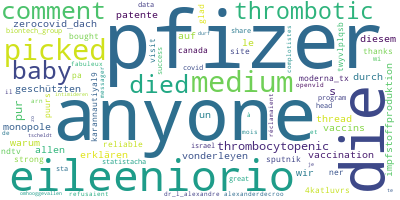

In [41]:
long_string = ','.join(list(df['TweetTextCleaned'].values)) # join the different processed titles together.
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue') # create a WordCloud object

wordcloud.generate(long_string) # generate a word cloud

wordcloud.to_image() # visualize the word cloud

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


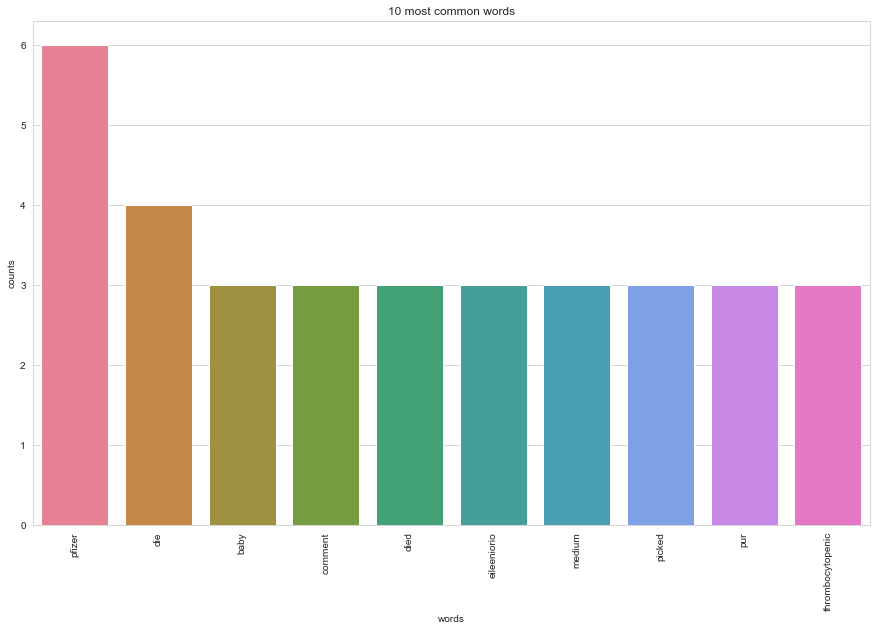

--- 0.12690997123718262 seconds ---


In [42]:
import time
start_time = time.time()

sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['TweetTextCleaned'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

print("--- %s seconds ---" % (time.time() - start_time))


# Topics

In [43]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 15
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


Topics found via LDA:

Topic #0:
pfizer vaccination vonderleyen baby medium comment thrombocytopenic thrombotic eileeniorio died pur picked reliable puurs pfizers

Topic #1:
die 22 thread impfstoffproduktion erklären durch diesem zerocovid_dach monopole patente geschützten auf wir warum allen

Topic #2:
pfizer vaccination vonderleyen baby medium comment thrombocytopenic thrombotic eileeniorio died pur picked reliable puurs pfizers

Topic #3:
pfizer vaccination vonderleyen baby medium comment thrombocytopenic thrombotic eileeniorio died pur picked reliable puurs pfizers

Topic #4:
pfizer vaccination vonderleyen baby medium comment thrombocytopenic thrombotic eileeniorio died pur picked reliable puurs pfizers

Topic #5:
pfizer karannautiyal9 4katluvrs bought sputnik twyvlplqsb ndtv canada moderna_tx vaccination vonderleyen eileeniorio comment pur thrombotic

Topic #6:
le vaccins vaccination mois complotistes réclamaient refusaient dr_l_alexandre messager et fabuleux arn il israel data

T

In [44]:
df.head()

,tweet_id,text,avg_word,word_count,char_count,stopwords,hastags,numerics,upper,TweetTextCleaned
0,1385619392323485698,karannautiyal9 4katluvrs ndtv pfizer moderna_t...,9.769231,13,139,1,0,0,0,karannautiyal9 4katluvrs ndtv pfizer moderna_t...
1,1385619423935954950,rt eileeniorio anyone picked this anyone mediu...,5.130435,23,140,6,0,0,2,eileeniorio anyone picked this anyone medium...
2,1385619449437466629,rt zerocovid_dach 22 diesem thread erklären wi...,6.050000,20,140,0,0,0,1,zerocovid_dach 22 diesem thread erklären wir...
3,1385619528462348289,rt eileeniorio anyone picked this anyone mediu...,5.130435,23,140,6,0,0,2,eileeniorio anyone picked this anyone medium...
4,1385619560800337923,rt vonderleyen glad visit pfizers puurs site t...,6.315789,20,139,3,0,0,1,vonderleyen glad visit pfizers puurs site th...


# Topic Visualization

In [45]:
%pip install -U pip setuptools
%pip install pyLDAvis

     |████████████████████████████████| 785 kB 6.2 MB/s eta 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 56.1.0
    Uninstalling setuptools-56.1.0:
      Successfully uninstalled setuptools-56.1.0
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [46]:
#Shows how these other topics are related to topic 0
#Shows how the topics are derived
%%time
import os
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
#LDAvis_data_filepath = os.path.join('D:/Politics2020/Cleaned/ldavis_prepared_'+str(number_topics))
LDAvis_data_filepath = os.path.join('TwitterProject')

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)


# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

#pyLDAvis.save_html(LDAvis_prepared, 'D:/Politics2020/Cleaned/ldavis_prepared_'+ str(number_topics) +'.html')
pyLDAvis.save_html(LDAvis_prepared, 'TwitterProject.html')

CPU times: user 138 ms, sys: 29.7 ms, total: 168 ms
Wall time: 724 ms
